In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ipl=pd.read_csv("IPL_Dataset.csv")

In [4]:
ipl.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     133 non-null    int64  
 1   Player  133 non-null    object 
 2   Mat     133 non-null    int64  
 3   Inns    133 non-null    int64  
 4   NO      133 non-null    int64  
 5   Runs    133 non-null    int64  
 6   HS      133 non-null    object 
 7   Avg     133 non-null    float64
 8   BF      133 non-null    int64  
 9   SR      133 non-null    float64
 10  100     133 non-null    int64  
 11  50      133 non-null    int64  
 12  4s      133 non-null    int64  
 13  6s      133 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 14.7+ KB


#### Q1. What is the maximum number of matches played by an individual player in a season?

In [6]:
ipl.sort_values("Mat",ascending=False).head(3)[["Player","Mat"]]

,Player,Mat
3,Shreyas Iyer,17
1,Shikhar Dhawan,17
67,Kagiso Rabada,17


In [7]:
# 2nd approach
ipl.nlargest(3,"Mat")[["Player","Mat"]]

,Player,Mat
1,Shikhar Dhawan,17
3,Shreyas Iyer,17
19,Marcus Stoinis,17


#### Q2. What is the highest average of a player in a season?

In [8]:
ipl.nlargest(1,"Avg")[["Player","Avg"]]

,Player,Avg
57,Deepak Hooda,101.0


In [5]:
# 2nd appraoch
ipl.sort_values("Avg",ascending=False).head(1)[["Player","Avg"]]

,Player,Avg
57,Deepak Hooda,101.0


#### Q3. What is the average number of matches played by the players in a season?

In [49]:
avg=round(sum(ipl["Mat"])/ipl.shape[0])
avg

10

#### Q4. Please check the correlation between all the features.

In [28]:
num_data=[fea for fea in ipl.columns if ipl[fea].dtype!="object"]
cat_data=[fea for fea in ipl.columns if ipl[fea].dtype!="object"]

In [30]:
numerical_data=ipl[num_data]

<Axes: >

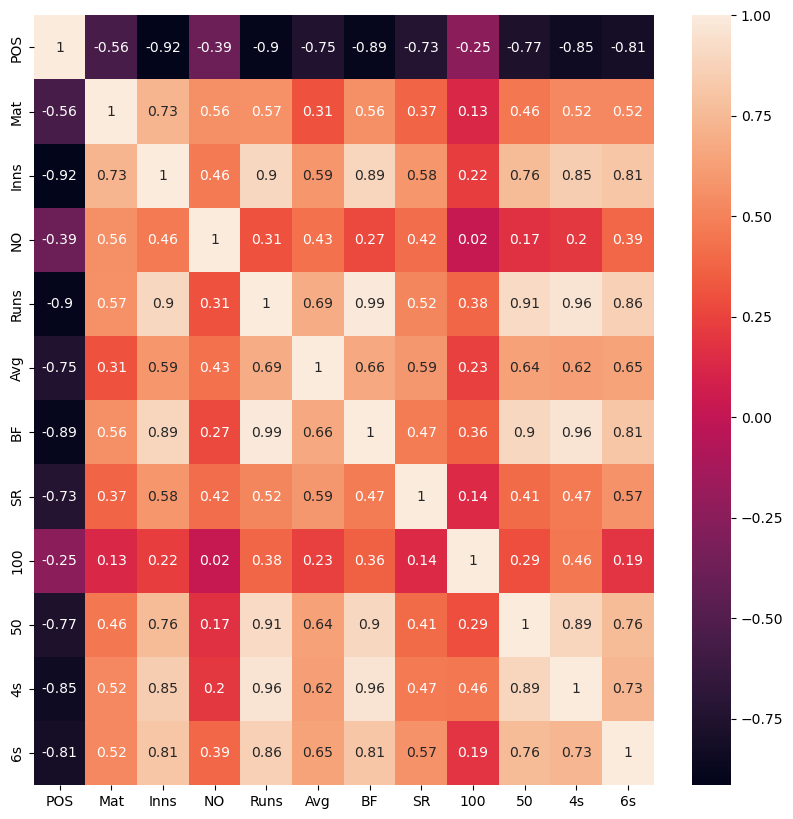

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_data.corr(),annot=True)

conclusion:<br>
    1.strong correlation btn total runs vs number of fours/number of inning <br>
    2.positive correlation btn Ball faced vs total runs / number of inning

#### Q5. Check the list of players who has an average greater than 50 as well strike rate above 120.

In [50]:
ipl.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [55]:
ipl[(ipl["Avg"]>50)&(ipl["SR"]>120)][["Player","Avg","SR"]]

,Player,Avg,SR
0,KL Rahul,55.83,129.34
4,Ishan Kishan,57.33,145.76
31,Kieron Pollard,53.60,191.42
36,Wriddhiman Saha,71.33,139.86
37,Ruturaj Gaikwad,51.00,120.71
57,Deepak Hooda,101.00,142.25
60,Tom Curran,83.00,133.87


#### Q6. Please check the list of players who has an average greater than 40 and balls faced above 100.

In [56]:
ipl[(ipl["Avg"]>40)&(ipl["BF"]>100)][["Player","Avg","BF"]]

,Player,Avg,BF
0,KL Rahul,55.83,518
1,Shikhar Dhawan,44.14,427
4,Ishan Kishan,57.33,354
8,Virat Kohli,42.36,384
9,AB de Villiers,45.40,286
10,Faf du Plessis,40.81,319
14,Eoin Morgan,41.80,302
24,Kane Williamson,45.28,237
27,Chris Gayle,41.14,210
28,Ben Stokes,40.71,200


#### Q7. Please check the list of players who scored more than 300 runs with an average greater than 45 & strike rate above 130.

In [61]:
ipl[(ipl["Runs"]>300)&(ipl["Avg"]>45)&(ipl["SR"]>130)][["Player","Runs","Avg","SR"]]

,Player,Runs,Avg,SR
4,Ishan Kishan,516,57.33,145.76
9,AB de Villiers,454,45.40,158.74
24,Kane Williamson,317,45.28,133.75


#### Q8. Players who scroed alteast one century in this season.

In [64]:
ipl[ipl["100"]>0][["Player","100"]].sort_values("100",ascending=False)

,Player,100
1,Shikhar Dhawan,2
0,KL Rahul,1
13,Mayank Agarwal,1
28,Ben Stokes,1


#### Q9. Players who scored atleast 4 half centuries in this season.

In [66]:
ipl[ipl["50"]>3][["Player","50"]]

,Player,50
0,KL Rahul,5
1,Shikhar Dhawan,4
2,David Warner,4
4,Ishan Kishan,4
5,Quinton de Kock,4
6,Suryakumar Yadav,4
7,Devdutt Padikkal,5
9,AB de Villiers,5
10,Faf du Plessis,4


#### Q10. Check the list of players who hit more than 45 boundARIES and more than 10 sixes in this season.

In [94]:
ipl[(ipl["4s"]>45)&(ipl["6s"]>10)][["Player","4s","6s"]]

,Player,4s,6s
0,KL Rahul,58,23
1,Shikhar Dhawan,67,12
2,David Warner,52,14
5,Quinton de Kock,46,22
6,Suryakumar Yadav,61,11


#### Q11. Plot a histogram of number of matches played in a season by players.


C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mat', ylabel='Count'>

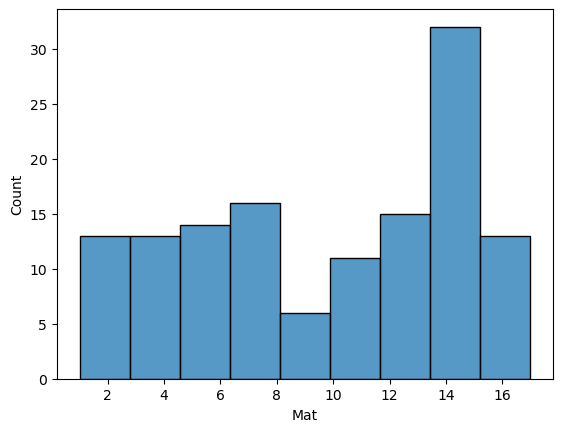

In [108]:
sns.histplot(x="Mat",data=ipl)

Conclusion:
    <br>
    1.more than 30 players played 14 matches

#### Q12. Plot the histogram of balls faced by players.


C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BF', ylabel='Count'>

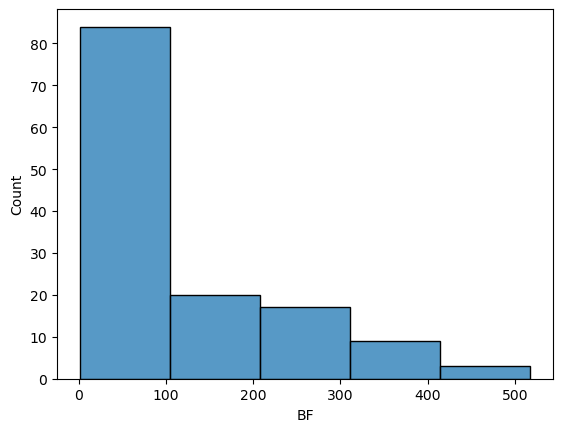

In [112]:
sns.histplot(x="BF",data=ipl,bins=5)

More than 80 players faced 100 balls

#### Q13. Top 20 players with most runs in a season.

In [89]:
ipl.sort_values("Runs",ascending=False).head(20)[["Player","Runs"]]

,Player,Runs
0,KL Rahul,670
1,Shikhar Dhawan,618
2,David Warner,548
3,Shreyas Iyer,519
4,Ishan Kishan,516
5,Quinton de Kock,503
6,Suryakumar Yadav,480
7,Devdutt Padikkal,473
8,Virat Kohli,466
9,AB de Villiers,454


#### Q14. Bar chart for top 20 players with best strike rate in a season.


<Axes: xlabel='Player'>

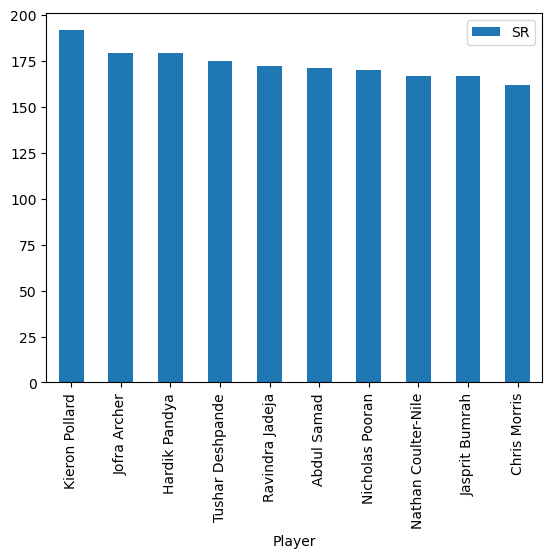

In [87]:
ipl.sort_values("SR",ascending=False).head(10).plot(x="Player",y="SR",kind="bar")

Pollard is the player whoes Strike rate is more than all the players.

#### Q15. Top 30 players with highest number of sixes.


In [81]:
ipl.sort_values("6s",ascending=False).head(30)[["Player","6s"]]

,Player,6s
4,Ishan Kishan,30
15,Sanju Samson,26
29,Hardik Pandya,25
17,Nicholas Pooran,25
14,Eoin Morgan,24
9,AB de Villiers,23
27,Chris Gayle,23
0,KL Rahul,23
31,Kieron Pollard,22
5,Quinton de Kock,22


#### Q16. Scatter plot of runs scored by a player v/s balls faced in a season.


C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Runs', ylabel='BF'>

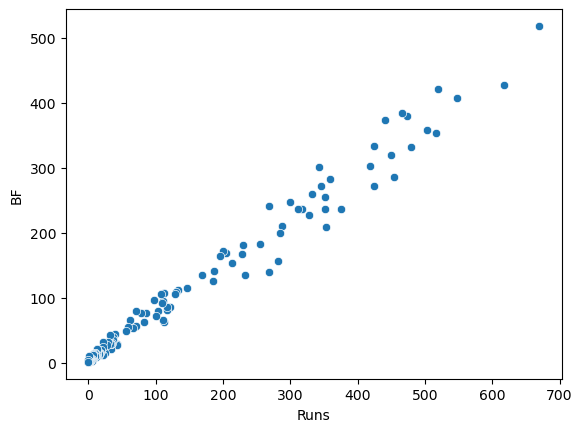

In [76]:
sns.scatterplot(data=ipl,x="Runs",y="BF")

Conclusion:
    <br>
    1.Runs vs Ball faced is positively correlated

#### Q17. KDE plot for averages on a season.

C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg', ylabel='Density'>

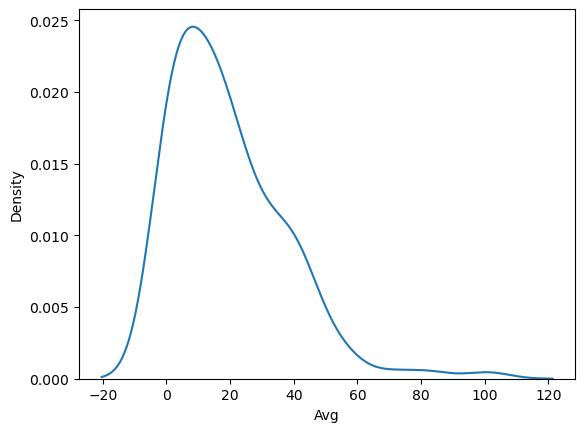

In [106]:
sns.kdeplot(x="Avg",data=ipl)

most number of Players Avg btn 0 to 30